![stars-header](./visuals/stars_header.png)

[Executive-Summary](./visuals/executive_summary.png)


# Imports

In [1]:
# Import data manipulation libraries
import pandas as pd
import numpy as np
import src

# Import data visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import radviz
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

# # Set plotting defaults
# sns.set(context='talk')

from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency, levene, shapiro, f_oneway, ttest_ind, kruskal


# Import preprocessing libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, classification_report

from warnings import filterwarnings
filterwarnings('ignore')

# Gathering the Stars in our Notebook: Acquire

Our stars are sitting in a file named `stars.csv`. Let's load it into our notebook using Pandas and explore it together.

In [2]:
# Read in the file named `stars.csv` from the data folder
df = src.get_star_data()

# Display the first 5 rows
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [3]:
# Display the last 5 rows
df.tail()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
235,38940,374830.0,1356.0,-9.93,Blue,O,5
236,30839,834042.0,1194.0,-10.63,Blue,O,5
237,8829,537493.0,1423.0,-10.73,White,A,5
238,9235,404940.0,1112.0,-11.23,White,A,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


## Initial Observations of the Beginning and End
---
### Let's learn about each feature
__Super HOT: `Temperature` (in kelvins)__
> The context of our dataset is objects in __SPACE__. The temperature values are in Kelvin scale and represent something hot, really hot. Our Sun has a surface temperature of 5,778 Kelvin. Looking at the last 5 stars of our dataset, we can see there are 3 stars that have a temperature 6 times as hot as the Sun.

#### Twinkle Twinkle : `L` for Relative Luminosity
> Luminosity is the amount of light an object gives off. This value represents the light emitted from a star relative to the luminosity of the Sun.
>
> `relative_luminosity` = Luminosity of a Star / Luminosity of the Sun

#### Round: `R` for Relative Radius
> Similar to `relative_luminosity`, the __radius__ of each star is relative to the radius of the Sun. From the last 5 rows of the dataset, we can see a few of stars have a radius 1,000 times larger than the Sun!
>
> `relative_radius` = Radius of a Star / Radius of the Sun

#### Comparing Twinkles to Twinkles: `A_M` for Absolute Magnitude
> __`Absolute magnitude`__ is a measure of the absolute brightness of a star. The brightness of each star is compared on a similar scale by setting the distance between the viewer (You and I) and the star to a distance of 10 parsecs (32.61 Light Years) in Space. The values are an inverse scale meaning brighter objects have a negative absolute magnitude and dim objects have a positive absolute magnitude.
>
>[las-cumbres-observatory-absolute-magnitude](https://lco.global/spacebook/distance/what-absolute-magnitude/)
>
><br>
><details>
    <summary>CLICK HERE for a visual explanation of Absolute magnitude</summary>
    <img src=./visuals/absolute_magnitude_explanation.png width="800" height="600" />
</details>

#### What Color is it?: `Color`
> Nothing fancy here so far. The colors we see are within the __"Visible Spectrum"__, the portion of the electromagnetic spectrum visible to the human eye. These colors include: Violet, Blue, Cyan, Green, Yellow, Orange, Red, and White (a mixture of colors). Let's check if there are more colors in a bit.
>
> [color-spectrum-wiki](https://en.wikipedia.org/wiki/Visible_spectrum#Spectral_colors)

#### Characteristics of a Star using Hydrogen???: `Spectral_Class`
> To understand this feature, we need to understand the Morgan-Keenan system.
>
> The Morgan-Kennan System classifies a star based on the temperature of its photosphere and ionization state. The photosphere is the outer shell of a star that radiates light. The temperature is evaluated on a letter scale: O>B>A>F>G>K>M where 'O' is the hottest and 'M' is the coolest.
>
> [morgan-keenan-wiki](https://en.wikipedia.org/wiki/Stellar_classification)

#### Name that Star: `Type`
> There are 6 types of stars in our dataset:
>
> Hyper Giants, Super Giants, Main Sequence, White Dwarf, Brown Dwarf, White Dwarf

In [4]:
# Display the column names, # of non-null observations, and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### Info Observations

We have 240 stars in our dataset and no missing values.

In [5]:
# Display the unique values in each column
df.nunique()

Temperature       228
L                 208
R                 216
A_M               228
Color              17
Spectral_Class      7
Type                6
dtype: int64

In [6]:
# Check to see if there are any duplicate rows
df.duplicated().any()

False

### Distinct Count Observations

`Temperature`, `Luminosity`, `Radius`, and `Absolute Magnitude` are continuous features that contain a few repeating values. `Color`, `Spectral Class`, and `Type` are categorical values with object and numeric data types.

There are 17 unique `colors` in the dataset.

There are no duplicate rows in the dataset.

In [7]:
# Display Summary Statistics of the numeric columns
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


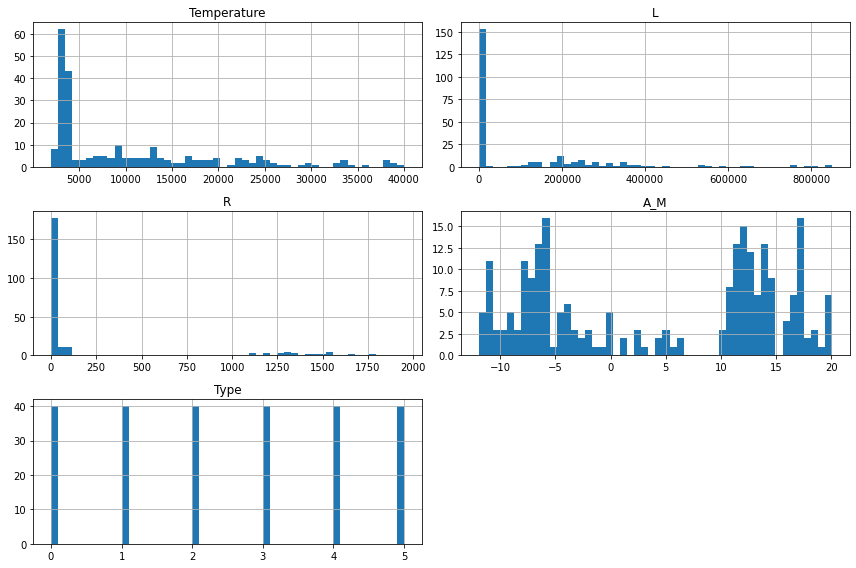

In [8]:
# Display the spread of each feature as a histogram
df.hist(figsize=(12, 8), bins=50)
plt.tight_layout();

### Summary Statistics Oberservations
- The distributions of `Temperature`, `Luminosity`, and `Radius` are positively skewed.
- `Absolute Magnitude` has a bimodal distribution.
- `Type` has a uniform distribution.


## Acquire Takeaways
- Stars dataset acquired from Kaggle:
- Created a function called `get_star_data()` in the `src` package.
- Temperature, Luminosity, Radius, and Absolute Magnitude are non-normally distributed.

<br>

# Grab your Telescopes: Prepare

## Data Cleaning

Created a function named `prep_star_data()` to clean the dataset.
1. Lowercase column names for easier data manipulation.
2. Rename ambiguous column names with descriptive names.
3. Map `star_type` numeric id's with their string counter part.
4. Convert the datatype of the `spectral_class`, and `color` to categorical and create factorized versions of these columns.
5. Clean and normalize the text in the `color` column.
6. Rearrange columns.

In [9]:
# Clean the stars dataset
df = src.prep_star_data(df)

## Create the train, validate, and test datasets
Created a function named `create_datasets()` to split the dataset into train, validate, and test sets.

The data was split using a 50%-37.5%-12.5% method. Stratifying the splits by the target variable `star_type` means that each `star_type` is split 20-15-5, with total of 40 stars for the 6 classes.

In [10]:
train, validate, test = src.create_datasets(df)

## Feature Engineering

Created a function named `scale_data()` that adds scaled features to the train, validate, and test datasets.

Scaled Temperature, Luminosity, Radius, and Absolute Magnitude columns using a MinMaxScaler. The scaled data was transformed into a normal distribution using Quantile Transformer

In [11]:
train, validate, test = src.scale_data(train, validate, test)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 236 to 133
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   temperature                   120 non-null    int64   
 1   luminosity                    120 non-null    float64 
 2   radius                        120 non-null    float64 
 3   absolute_magnitude            120 non-null    float64 
 4   color                         120 non-null    category
 5   spectral_class                120 non-null    category
 6   spectral_class_num            120 non-null    int64   
 7   color_num                     120 non-null    int64   
 8   scaled_temperature            120 non-null    float64 
 9   scaled_luminosity             120 non-null    float64 
 10  scaled_radius                 120 non-null    float64 
 11  scaled_absolute_magnitude     120 non-null    float64 
 12  quantiled_temperature         120 non-null    fl

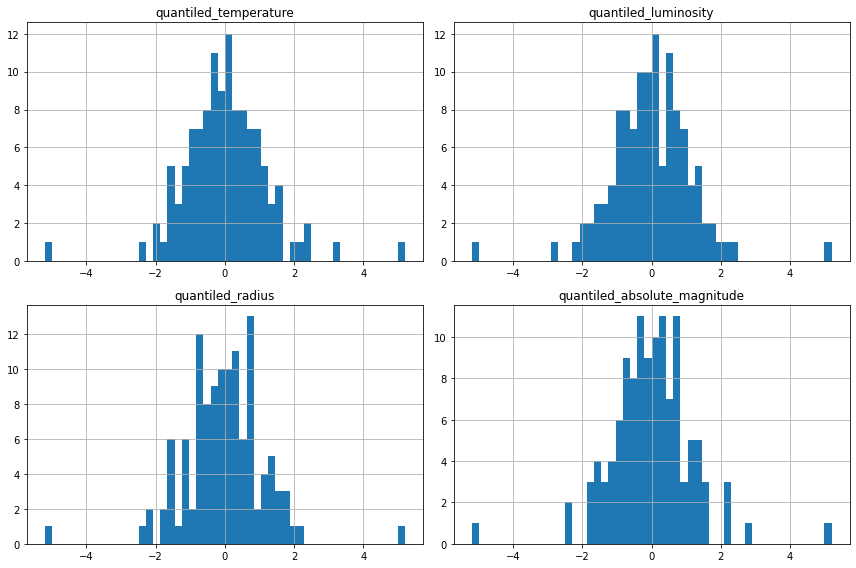

In [13]:
train.iloc[:,12:16].hist(figsize=(12, 8), bins=50)
plt.tight_layout();

# Explore the Stars: Exploration

So, what determines __Star Type__? Let's find out by visualizing the features and forming hypothesis we can test.

### Continuous Feature Visualizations
1. Pearson's R Correlation Plot
2. Pairplots
    - Scaled Features
    - Quantiled Features
3. 3-D Scatterplot

### Continuous v. Discrete Feature Visualizations
1. Boxplots

### Discrete v. Discrete Feature Visualizations
1. Crosstables

## Pearson's Correlation

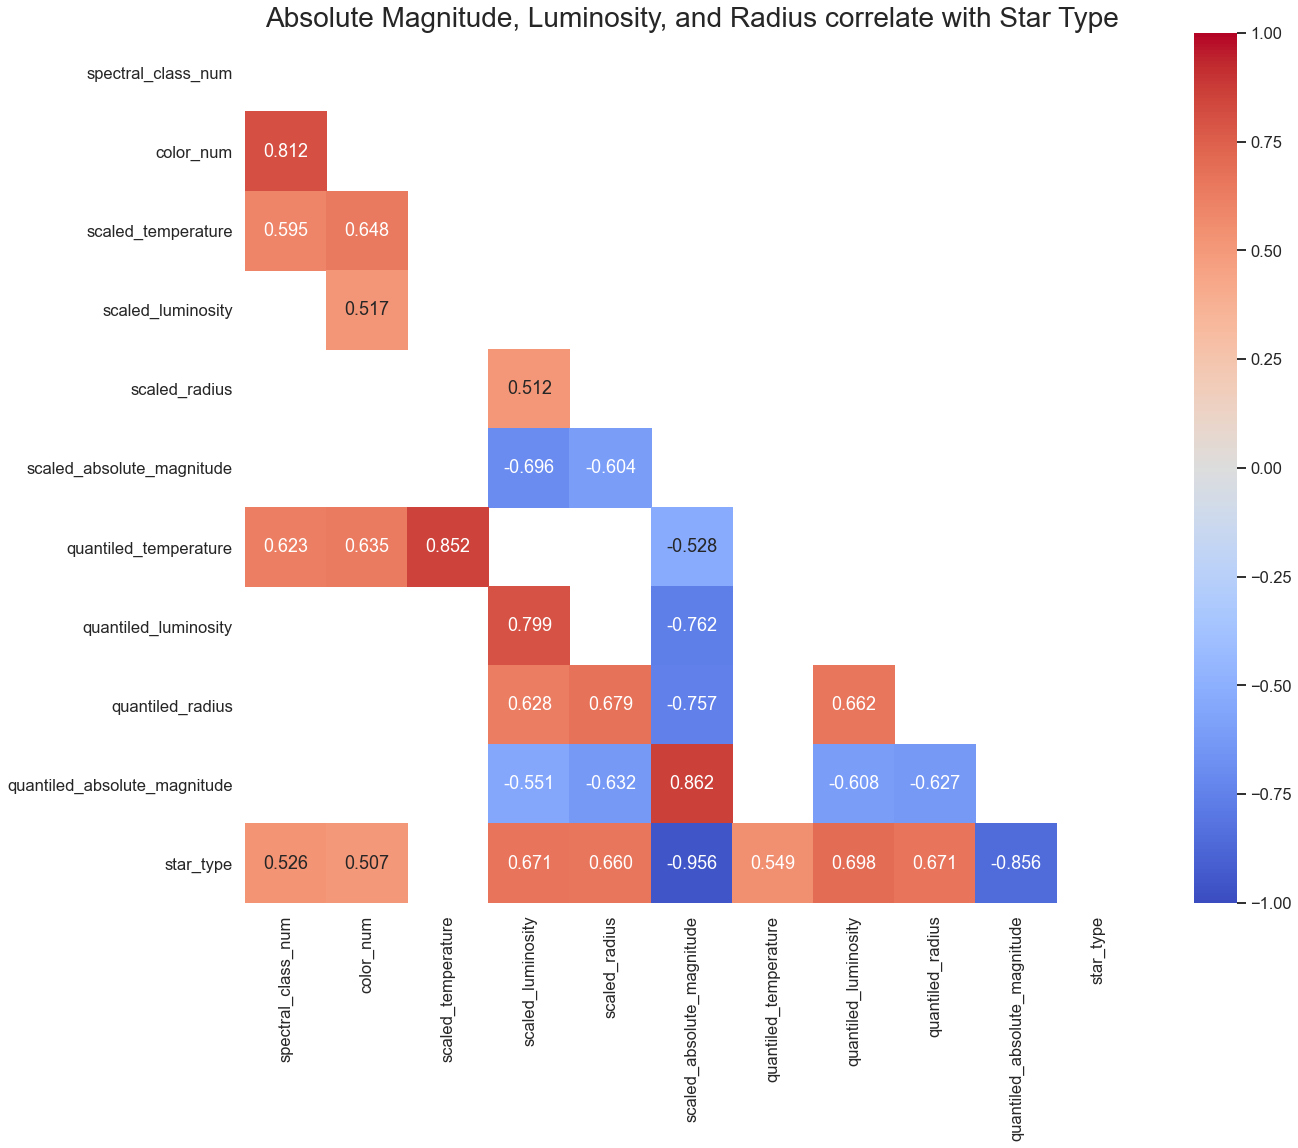

In [14]:
src.pearson_correlations(train)

###  Pearson Correlation Observations


## Pairplots

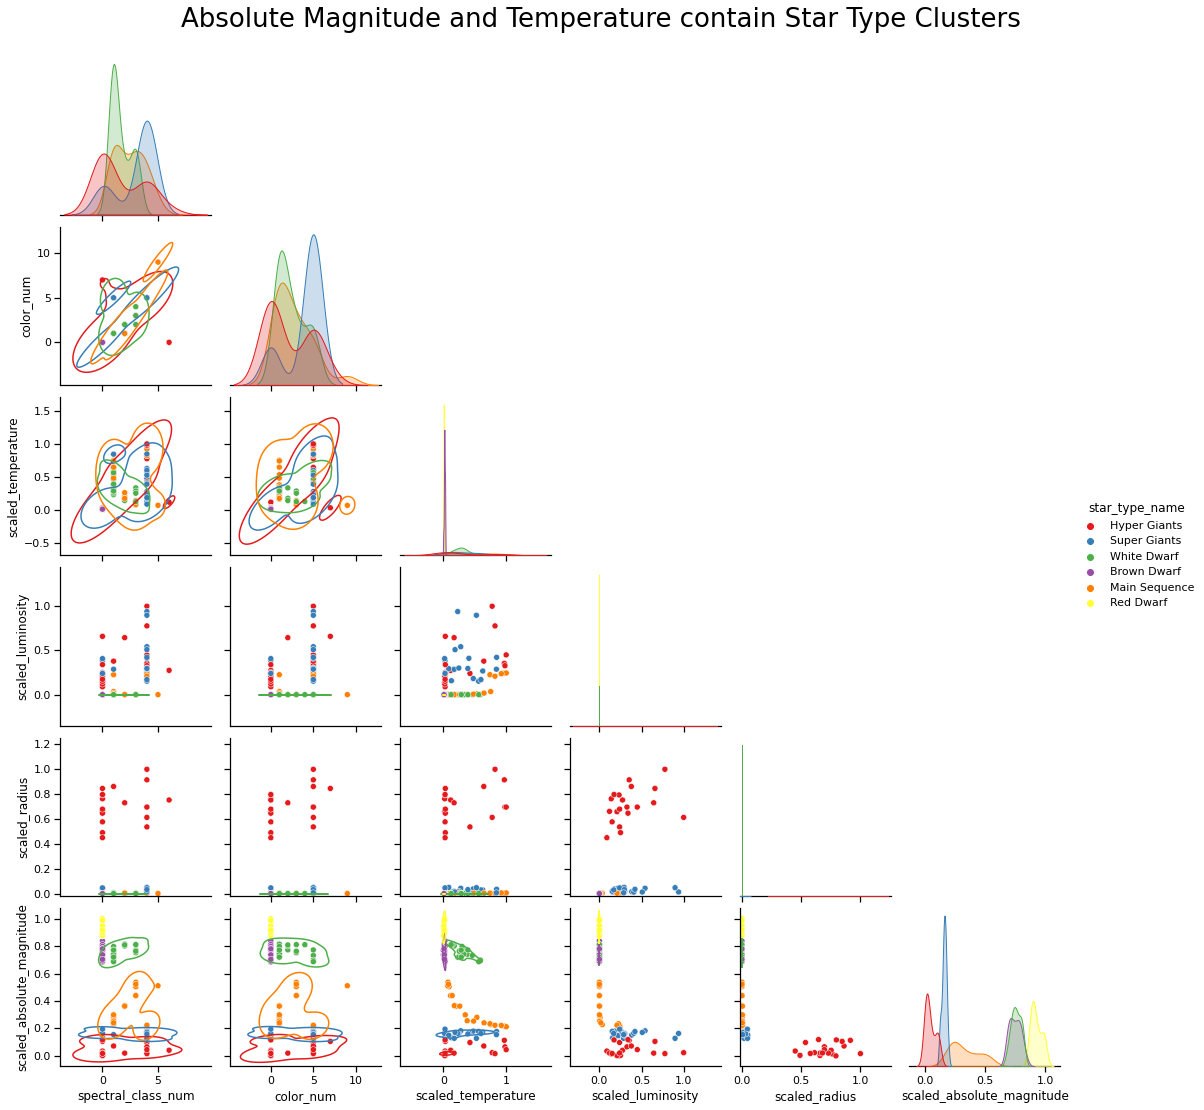

In [15]:
src.scaled_pairplot(train)

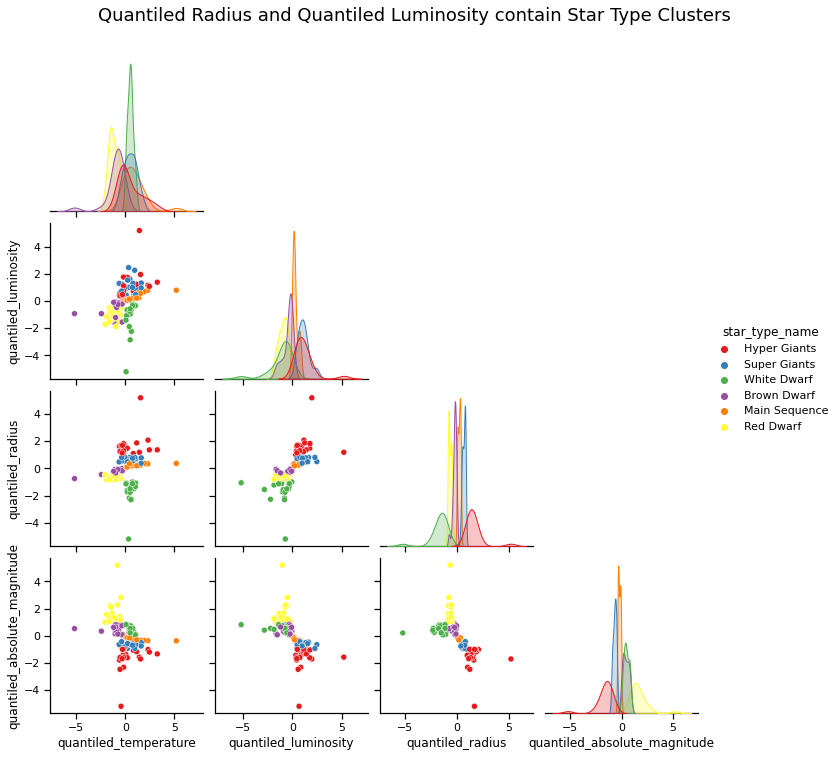

In [16]:
src.quantiled_pairplot(train)

### Pairplot Observations

### 3-Dimensional Scatter Plot

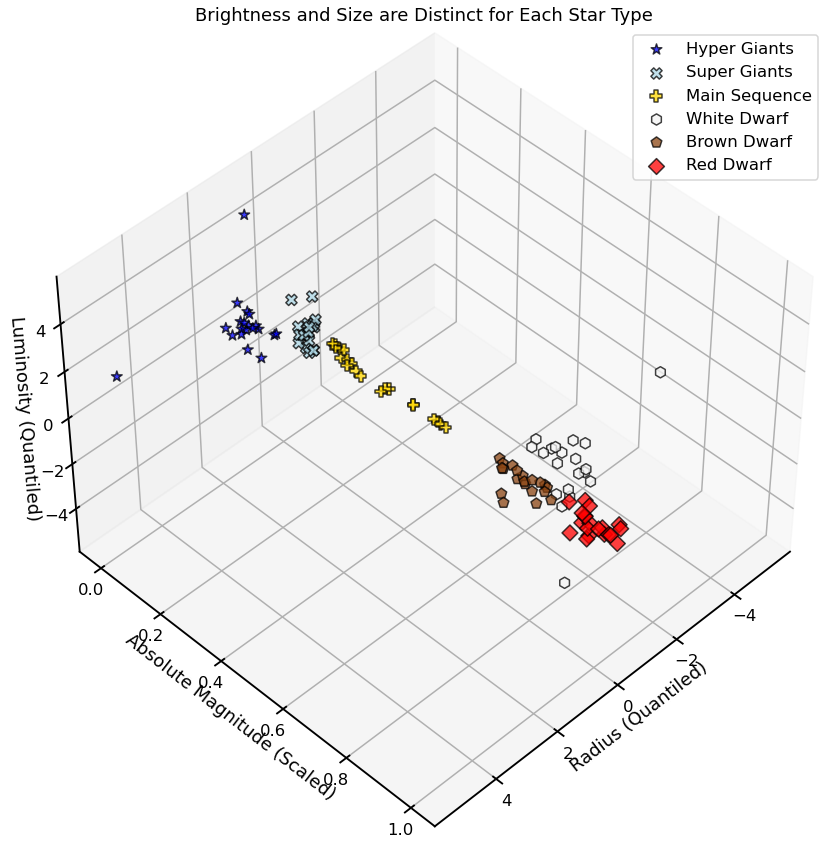

In [17]:
src.three_d_scatter(train)

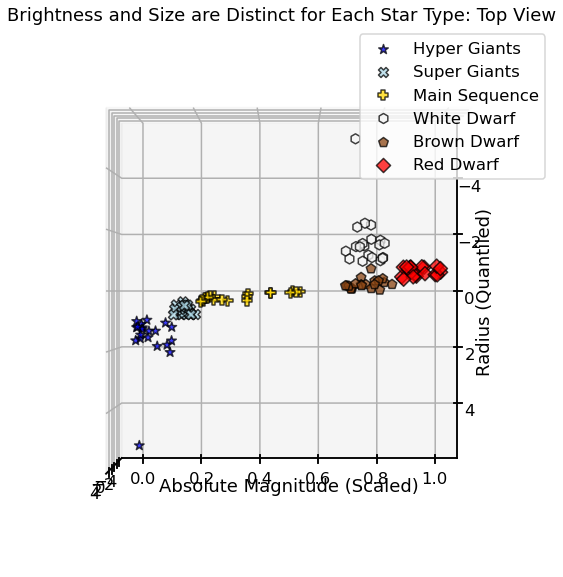

In [18]:
src.two_d_scatter(train)

## Visualizing the Distribution of Values across Star Types: Boxplots

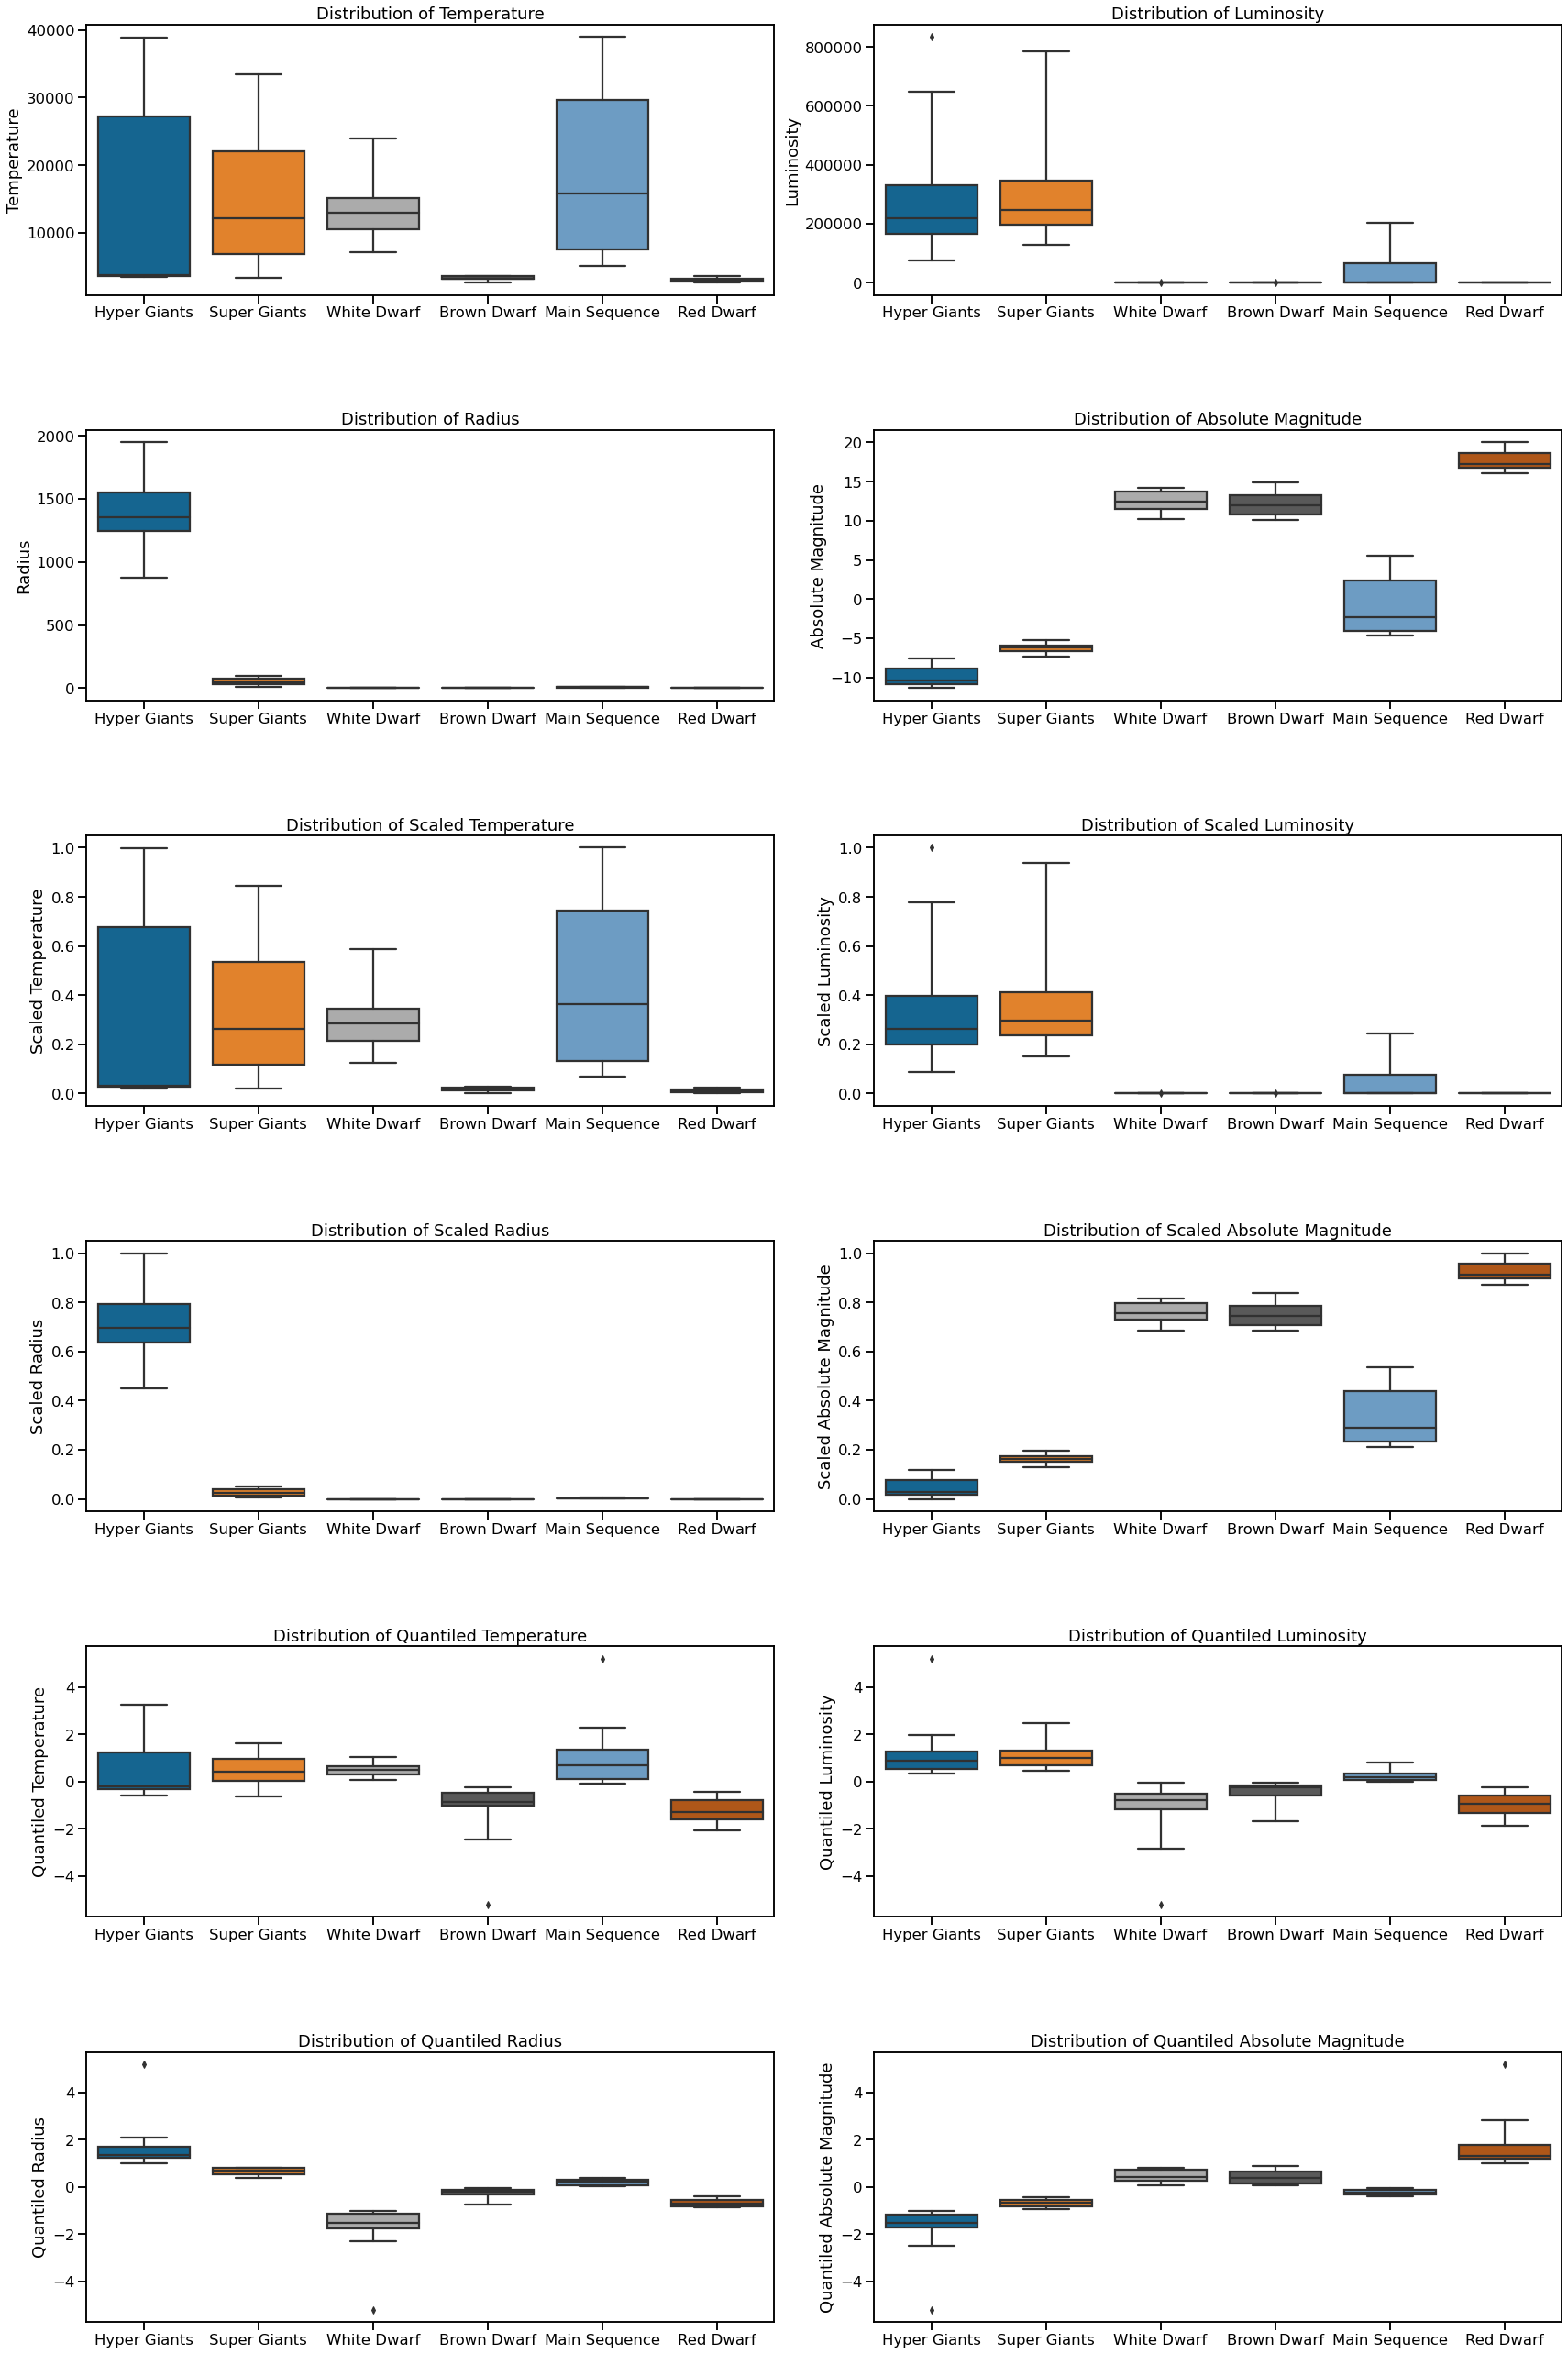

In [19]:
src.boxplots(train)

## Categorical Features

In [177]:
star_color_ctb = pd.crosstab(train['star_type_name'], train['color'])
star_spectral_class_ctb = pd.crosstab(train['star_type_name'], train['spectral_class'])
color_spectral_class_ctb = pd.crosstab(train['color'], train['spectral_class'])

cbar_format = {'ticks':list(np.arange(0, 21, 5))}

colors_sorted = ['red', 'orange red', 'orange', 'pale yellow orange', 'yellow white', 'white', 'blue white', 'blue']
stars_sorted = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants']
spectral_sorted = list('MKGFABO')

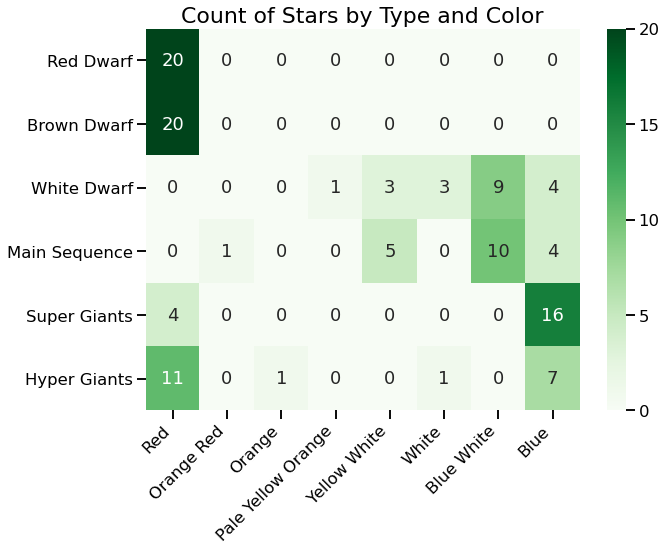

In [179]:
plt.figure(figsize=(10, 8))

sns.heatmap(star_color_ctb.loc[stars_sorted,colors_sorted],
            cmap='Greens',
            annot=True,
            cbar_kws=cbar_format)

plt.title('Count of Stars by Type and Color', fontsize=22)
plt.xlabel('')
plt.ylabel('')

plt.xticks(ticks=np.arange(.5, len(star_color_ctb.columns)+.5),
           labels=[label.title() for label in list(star_color_ctb.loc[stars_sorted,colors_sorted].columns)],
           ha='right',
           rotation=45)

plt.tight_layout()
plt.show()

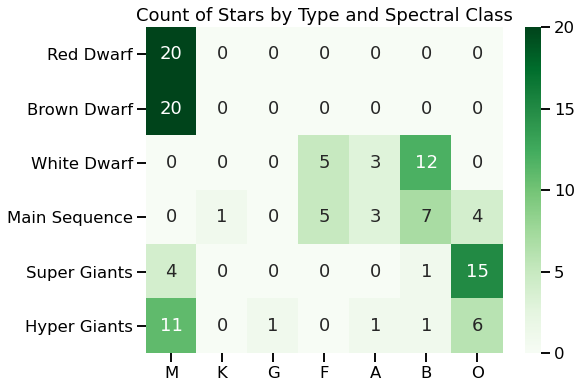

In [180]:
plt.figure(figsize=(8, 6))

sns.heatmap(star_spectral_class_ctb.loc[stars_sorted,spectral_sorted],
            cmap='Greens',
            annot=True,
            cbar_kws=cbar_format)

plt.title('Count of Stars by Type and Spectral Class', fontsize=18)
plt.xlabel('')
plt.ylabel('')

plt.show()

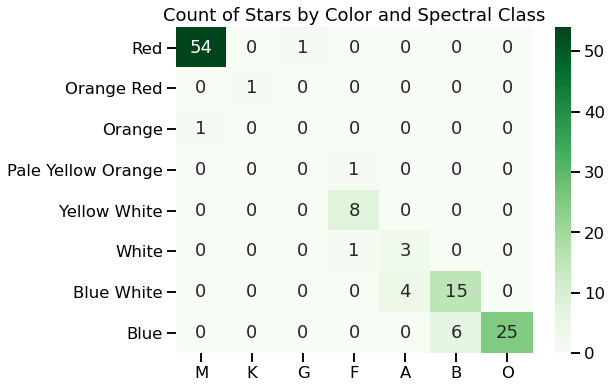

In [197]:
plt.figure(figsize=(8, 6))

a = color_spectral_class_ctb.loc[colors_sorted, spectral_sorted]

sns.heatmap(a,
            cmap='Greens',
            annot=True)

plt.title('Count of Stars by Color and Spectral Class', fontsize=18)
plt.xlabel('')
plt.ylabel('')

plt.yticks(ticks=np.arange(.5, len(a.index)+.5),
           labels=[label.title() for label in list(a.index)],
           ha='right')

plt.show()

In [201]:
import plotly.express as px
sns.set_context('talk')

fig = px.parallel_categories(train,
                             dimensions=['star_type_name', 'spectral_class'],
                             color='scaled_absolute_magnitude',
                             color_continuous_scale=px.colors.sequential.Bluered,
                
                title='Larger Stars Hotter are Brighter, Regardless of Distance in Space',

                labels={'star_type_name':'Star',
                        'spectral_class':'Spectral Class',
                        'scaled_absolute_magnitude':'Absolute Magnitude'})

fig.update_layout(font_size=18,
                  width=900,
                  height=800)
fig.show()

## Hypothesis Testing

In [24]:
confidence_interval = .95
alpha = 1 - confidence_interval

### One Sample T-Test

Is the radius of Hyper Giants significantly greater than the average radius of the population?

__Null Hypothesis__
> The radius of Hyper Giant Stars are equal to or less than the average radius of the population.

__Alternative Hypothesis__
> The radius of Hyper Giant Stars are significantly greater than the average radius of the population.

In [25]:
hyper_giants_r = train[train['star_type_name'] == 'Hyper Giants']['radius']
pop_mean_r = train.radius.mean()

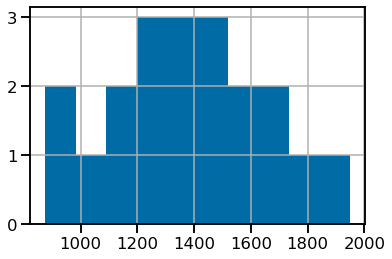

In [26]:
hyper_giants_r.hist(bins=10);

In [27]:
# Running a shapiro test to determine if the Hyper Giants are normally distributed.
shapiro(hyper_giants_r)

ShapiroResult(statistic=0.9912548661231995, pvalue=0.999248743057251)

In [28]:
t, p = ttest_1samp(hyper_giants_r, pop_mean_r, alternative='greater')

In [29]:
if p < alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Reject the Null Hypothesis


### ANOVA Test

In [30]:
# normally_distributed = []

# for star in [star0, star1, star2, star3, star4, star5]:
#     normal = 0
#     non_normal = 0
    
#     star_code = star.star_type.unique()[0]
#     for col in numeric_cols:
#             t, p = shapiro(star[col])

#             if p < .05:
#                 print(f'{col} is NOT normally distributed')
#                 non_normal += 1
#             else:
#                 print(f'{col} IS normally distributed')
#                 normal += 1
#                 normally_distributed.append((star_code, col))
#     print()
#     print('Normally Distributed', normal)
#     print('False', non_normal)
#     print()

### Chi Squared Test

Is a star's type dependent on the spectral class?

__Null Hypothesis__
> A star's type is independent of its spectral_class.

__Alternative Hypothesis__
> A star's type is dependent on its spectral_class.

In [31]:
chi, p, dof, _ = chi2_contingency(star_spectral_class_ctb)

In [32]:
if p < alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Reject the Null Hypothesis


### Chi Squared Test

Is a star's type dependent on its color?

__Null Hypothesis__
> A star's type is independent of its color.

__Alternative Hypothesis__
> A star's type is dependent on its color.

In [33]:
chi, p, dof, _ = chi2_contingency(star_color_ctb)

In [34]:
if p < alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Reject the Null Hypothesis


### Chi Squared Test

Is a star's spectral class dependent its the color?

__Null Hypothesis__
> A star's spectral class is independent of its color.

__Alternative Hypothesis__
> A star's spectral class is dependent on its color.

In [35]:
chi, p, dof, _ = chi2_contingency(color_spectral_class_ctb)

In [36]:
if p < alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Reject the Null Hypothesis


## Exploration Summary

<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Model

1. Preprocessing: Split datasets into feature and target
1. Create a baseline model
1. Create a model
1. Compare model with the baseline

## Preprocessing

In [37]:
# Create a variable to store the name of the target variable.
TARGET = 'star_type'

cols_to_scale = ['temperature', 'luminosity', 'radius', 'absolute_magnitude']
scaled_cols = [f'scaled_{col}' for col in cols_to_scale]

# Create a list of nonnumeric columns to remove from the dataset.
columns_to_drop = list(train.select_dtypes(exclude='number').columns)
columns_to_drop.append(TARGET)
columns_to_drop.extend(cols_to_scale)
columns_to_drop.extend(scaled_cols)

# Automate data splitting using python's built-in exec() function.
for dataset in ['train', 'validate', 'test']:
    exec(f'X_{dataset}={dataset}.drop(columns=columns_to_drop)')
    exec(f'y_{dataset}={dataset}[[TARGET]]')

In [38]:
X_train

,spectral_class_num,color_num,quantiled_temperature,quantiled_luminosity,quantiled_radius,quantiled_absolute_magnitude
236,4,5,1.429188,5.199338,1.187018,-1.581118
166,4,5,0.877330,0.505782,0.804667,-0.491167
29,3,4,0.069663,-5.199338,-1.060862,0.810142
176,4,5,0.805769,0.741715,1.091496,-1.079276
113,0,0,-0.607165,0.420655,1.625118,-1.795292
...,...,...,...,...,...,...
175,0,0,-0.298851,0.484702,1.700422,-1.010254
149,1,1,0.482361,-0.570280,-1.507048,0.208380
191,0,0,-0.760605,-0.245700,-0.085689,0.118629
12,0,0,-1.000463,-1.209254,-0.337244,0.639130


In [39]:
y_train

,star_type
236,5
166,4
29,2
176,5
113,5
...,...
175,5
149,2
191,1
12,1


## Create a Baseline Model

In [40]:
y_train.value_counts()

star_type
0            20
1            20
2            20
3            20
4            20
5            20
dtype: int64

In [41]:
total = y_train.count()[0]
print(total)

120


In [42]:
baseline = 28/total

print(f'The baseline model makes a correct prediction about 1/6 times or {baseline:.2%}.')

The baseline model makes a correct prediction about 1/6 times or 23.33%.


#### Baseline Observation

## Create a Classification Model

In [43]:
# Create model object
tree = DecisionTreeClassifier(random_state=369)

# Fit the object to the data
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=369)

### Train

In [44]:
# Calculate the accuracy of the training set
tree.score(X_train, y_train)

1.0

#### Cross Validation

In [45]:
print('Performing Cross Validation...', end='\n\n')
cross_validation = cross_val_score(DecisionTreeClassifier(),
                                   X_train,
                                   y_train,
                                   cv=10,
                                   scoring='accuracy',
                                   n_jobs=-1)

print('Scoring Metric: Accuracy', end='\n\n')

print('Results'.center(21, '-'))
print(f'Lowest Score: {cross_validation.min():.2%}')
print(f'Highest Score:{cross_validation.max():.2%}')
print(f'Average Score: {cross_validation.mean():.2%}')

Performing Cross Validation...

Scoring Metric: Accuracy

-------Results-------
Lowest Score: 100.00%
Highest Score:100.00%
Average Score: 100.00%


### Validate

In [46]:
print(f'Accuracy of the Validation set: {tree.score(X_validate, y_validate):.2%}')

Accuracy of the Validation set: 97.78%


### Test

In [47]:
test_score = tree.score(X_test, y_test)
print(f'Accuracy of the Test set: {test_score:.2%}')

Accuracy of the Test set: 100.00%


### Evaluate

In [48]:
y_pred = tree.predict(X_test)

c_matrix = confusion_matrix(y_test, y_pred)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [50]:
    star_type_map = {0: 'Red Dwarf',
                     1: 'Brown Dwarf',
                     2: 'White Dwarf',
                     3: 'Main Sequence',
                     4: 'Super Giants',
                     5: 'Hyper Giants'}

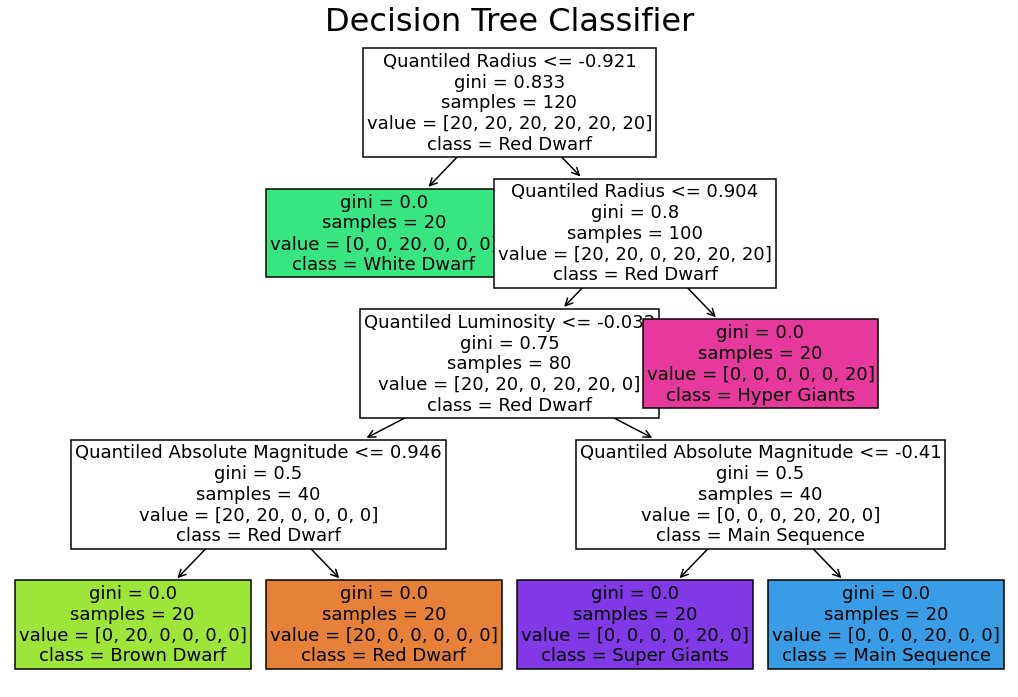

In [51]:
sns.set_context('talk')

plt.figure(figsize=(18, 12))
plot_tree(tree,
          feature_names=[column.replace('_', ' ').title() for column in X_test.columns],
          fontsize=18,
          class_names=list(star_type_map.values()),
          filled=True)

plt.title('Decision Tree Classifier', fontsize=32)
plt.show()

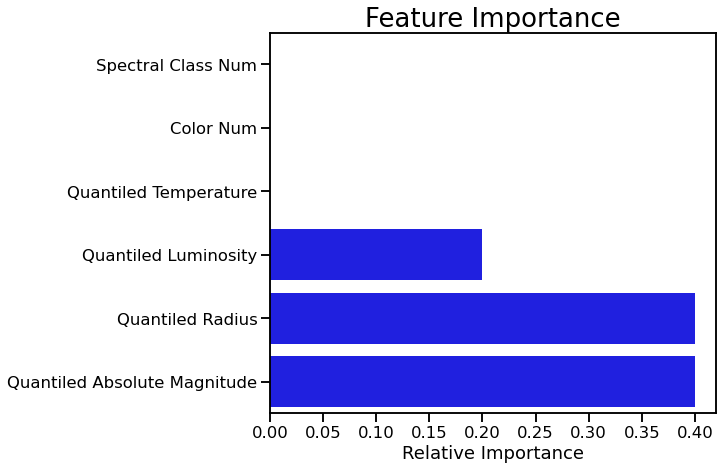

In [52]:
indices = list(np.argsort(tree.feature_importances_))
importances = tree.feature_importances_[indices]

target = list(X_train.columns[indices])
target = [star.replace('_', ' ').title() for star in target]


plt.figure(figsize=(8, 7))
sns.barplot(x=importances,
            y=target,
            orient='h',
            color='blue')

plt.title('Feature Importance', fontsize=26)
plt.xlabel('Relative Importance')
plt.show()

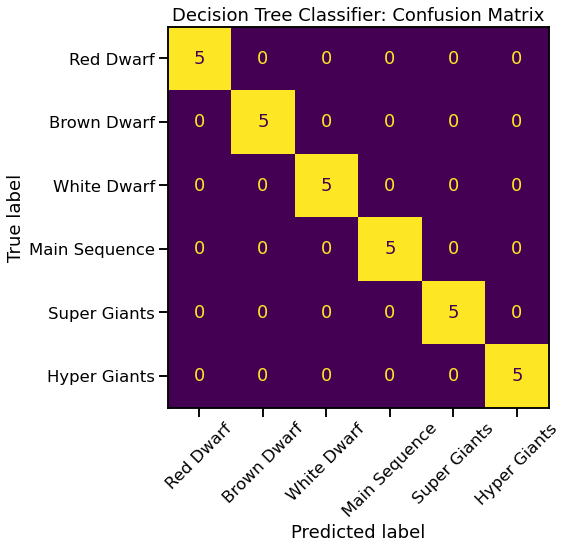

In [53]:
sns.set_context('talk')
c_matrix_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=star_type_map.values())

fig, ax = plt.subplots(figsize=(8,8))
c_matrix_display.plot(ax=ax, colorbar=False, xticks_rotation=45)

plt.title('Decision Tree Classifier: Confusion Matrix')
plt.tight_layout()
plt.show()

In [54]:
delta = (test_score/baseline)-1
print(f'Our decision tree classification model out performed the baseline by {delta:.0%}.')

Our decision tree classification model out performed the baseline by 329%.


# Conclusions

A stars absolute magnitude, radius, and luminosity determine a star's type.